# installation python libraries if required . 

In [1]:
# !pip install pandas  
# !pip install xlrd 
# !pip install numpy 
# !pip install matplotlib  
# !pip install re 
# !pip install sklearn
# !pip install scipy

# importing python libraries

In [2]:
# python library import for data processing and analysis 
import pandas as pd 
import numpy as np 
from scipy import stats 

# python library import for data pattern find 
import re 

# load boston dataset from sklearn.datasets 
from sklearn.datasets import load_boston 

# check of continuous variables 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_categorical_dtype 
from pandas.api.types import is_datetime64_dtype 
from pandas.api.types import is_object_dtype 

# sklearn IsolationForest model for univariate outlier analysis and removal 
from sklearn.ensemble import IsolationForest 

# python library import for data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline 


# -------------------------------------------------------------------------------------------------
#                                        solution 1
# -------------------------------------------------------------------------------------------------

# a function in python that inputs a dataframe and identify which columns have date in them. 
# Using these date columns make new columns which are difference between 
# these columns taking 2 at a time. (for instance if there is date1, date2, date3 columns, 
# output should be like date1-date2, date2-date3, date1-date3). 

# I built a dataset in a custom xlsx file and 
# then converted the xlsx file to csv file for csv file dataframe

In [1]:

df = pd.read_excel("date_file.xlsx")
df.to_csv("date_file.csv", index = None)
df = pd.read_csv("date_file.csv")
df

NameError: name 'pd' is not defined

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# I checked for each column in my dataframe to check - 
# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


# a) I splitted data based on '-' or '.' or '|' or '/' or ' '   .

# -----------------------------------------------------------------------------------------

# b) then I checked if year is at 3 position such as '07-16-2020' or "16-07-2020", 
#    then I change year at first postion 
#    such as  '07-16-2020' to '2020-16-07' or "16-07-2020" to '2020-07-16' 

# -----------------------------------------------------------------------------------------

# c) then I checked if 2nd position is more than 12 or more than 12 months , if yes, 
#    then changed 3rd postion to 2nd position and 2nd postion to 3rd position, 
#    so that month is in 2nd postion and more than 12 value or date value in 3rd postion 

# -----------------------------------------------------------------------------------------

# d) then I check if the data content is similar to date and not more content, 
#    such as if data is "07-16-2020 00:00:00" --- 6 data part after split 
#    or "07-16-2020" --- 3 data part after split. but if the data is such as 
#    - "2020-06-26 other data" or "2020-06-26 01:01:01 content data" , 
#    then it will be not a date type data and may be a data of a description or title 
#    or other not date type column.  

# -----------------------------------------------------------------------------------------

# e) then I checked if the the 2 integer data in each data part of splitted data are 
#    of total 5 for "07-16-2020 00:00:00" type data that is month, date, hour, minute and second . 
#    and 2 for "07-16-2020" that is month and date . 

# -----------------------------------------------------------------------------------------

# f) then I format date to 1 type of from such as 
#    "2020:07/16 00-00.00" to "2020-07-16 00:00:00" 
#    or 
#    "2020/:07.16" to "2020-07-16" . 

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [4]:
def date_process(date):
    list_1 = re.split(r'[-.:/ ]\s*', date)
    #print(list_1)
    
    if(len(list_1[2])==4):
        store_1 = list_1[0]  
        list_1[0] = list_1[2]  
        list_1[2] = store_1
        
    #print(list_1)
        
    if(int(list_1[1])>12):
        store_1 = list_1[2]  
        list_1[2] = list_1[1]  
        list_1[1] = store_1  
    #print(list_1)
    len5 = (len(re.split(r'[-.:/ ]\s*', date)) == 6)
    #print(len5)
    len2 = (len(re.split(r'[-.:/ ]\s*', date)) == 3) 
    #print(len2)
    cnt2_datetime = ([len(ele) for ele in list_1].count(2) == 5)
    #print(cnt2_datetime)
    cnt2_date = ([len(ele) for ele in list_1].count(2) == 2)
    #print(cnt2_date)
    cnt4 = ([len(ele) for ele in list_1].count(4) == 1)
    #print(cnt4)

    #print((len5 or len2) and ((cnt2_datetime or cnt2_date) and cnt4))
    if(len(list_1)==6):
        date = list_1[0] + "-" + list_1[1] + "-" + list_1[2] + " " + list_1[3] + ":" + list_1[4] + ":" + list_1[5]
    elif(len(list_1)==3):
        date = list_1[0] + "-" + list_1[1] + "-" + list_1[2] 
    #print("date = ", date)
    return date 


# I checked each column of my data frame for date type column and if found a column is of date or date time type, I converted data to 1 type of string format of date or date time type format, 
# then I converted the date column to pandas date time column type by pd.to_datetime(column data of type date or date time) . 

In [5]:
date_column_list = []
for col_data in df.columns.to_list():
    try:
        df[col_data] = df[col_data].map(lambda data: date_process(str(data)))
        df[col_data] = pd.to_datetime(df[col_data])
        print(col_data, " is a DATE COLUMN . ")
        date_column_list.append(col_data)
        print(df[col_data].dtypes)
    except:
        print(col_data, " is not a date column . ")
    print(df[col_data])

df.to_csv("date_file.csv", index = None)
df = pd.read_csv("date_file.csv")
df["data3"] = pd.to_datetime(df["data3"])
df["data6"] = pd.to_datetime(df["data6"])
df    

data1  is not a date column . 
0      0.05
1      1.00
2    100.00
Name: data1, dtype: float64
data2  is not a date column . 
0    10
1    16
2    26
Name: data2, dtype: int64
data3  is a DATE COLUMN . 
datetime64[ns]
0   2020-07-31 00:00:00
1   2020-07-16 00:00:00
2   2020-07-18 00:00:02
Name: data3, dtype: datetime64[ns]
data4  is not a date column . 
0    33
1     3
2     6
Name: data4, dtype: int64
data6  is a DATE COLUMN . 
datetime64[ns]
0   2020-10-31 00:00:00
1   2020-07-18 00:00:01
2   2020-07-19 00:00:00
Name: data6, dtype: datetime64[ns]
data8  is not a date column . 
0    100000
1       101
2    101010
Name: data8, dtype: int64
date10  is not a date column . 
0    data check 1
1    data check 2
2    data check 3
Name: date10, dtype: object


,data1,data2,data3,data4,data6,data8,date10
0,0.05,10,2020-07-31 00:00:00,33,2020-10-31 00:00:00,100000,data check 1
1,1.00,16,2020-07-16 00:00:00,3,2020-07-18 00:00:01,101,data check 2
2,100.00,26,2020-07-18 00:00:02,6,2020-07-19 00:00:00,101010,data check 3


In [6]:
# printed the date or date time column 

In [7]:
print(date_column_list)

['data3', 'data6']


#  built a new column with column name of type - 
#  date time column (i) minus date time (i+1)  
#  , 
#  for i = 0 to more and length of i is total date type column in data frame . 

In [8]:
for i in range(len(date_column_list)):
    if((i+1) == len(date_column_list)):
        break
    df[date_column_list[i] + " - " +  date_column_list[i+1]] = df[date_column_list[i]] - df[date_column_list[i+1]]
df                                                                                

,data1,data2,data3,data4,data6,data8,date10,data3 - data6
0,0.05,10,2020-07-31 00:00:00,33,2020-10-31 00:00:00,100000,data check 1,-92 days +00:00:00
1,1.00,16,2020-07-16 00:00:00,3,2020-07-18 00:00:01,101,data check 2,-3 days +23:59:59
2,100.00,26,2020-07-18 00:00:02,6,2020-07-19 00:00:00,101010,data check 3,-1 days +00:00:02


# -------------------------------------------------------------------------------------------------
#                                        solution 3
# -------------------------------------------------------------------------------------------------

# function in python that take dataframe as input and drop columns having Pearson correlation more than 0.85 . 


In [9]:
drop_column_greater_than_pearson_correlation = 0.85 

# function to build heatmap chart of pearson correlation 

In [10]:
def pearson_corr_plot(corr_matrix_pearsoncorr):
    sns.heatmap(corr_matrix_pearsoncorr, 
            xticklabels=corr_matrix_pearsoncorr.columns,
            yticklabels=corr_matrix_pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
    plt.show()

# function to drop column of pearson correlation more than drop_column_greater_than_pearson_correlation variable data . 

In [11]:

def drop_column_greater_than_pearson_correlation_data_process(df):
    # rename dataframe column
    for col_data in df.columns.to_list():
        df = df.rename(columns={col_data: "column_"+str(col_data)})

    # print dataframe
    print(df)

    # Create correlation matrix
    corr_matrix_pearsoncorr = df.corr(method='pearson', min_periods=1).abs()

    print("\n--------------   corr_matrix_pearsoncorr   --------------------")
    print(corr_matrix_pearsoncorr)
    print("---------------------------------------------------------------\n")

    pearson_corr_plot(corr_matrix_pearsoncorr)
    
    # Select upper triangle of correlation matrix
    upper = corr_matrix_pearsoncorr.where(np.triu(np.ones(corr_matrix_pearsoncorr.shape), k=1).astype(np.bool))

    # Find feature columns with correlation greater than 0.85
    to_drop = [column for column in upper.columns if any(upper[column] > drop_column_greater_than_pearson_correlation)]
    # Drop features 
    df1 = df.drop(df[to_drop], axis=1)
    return df1

# dataset

In [12]:
# feature matrix with correlated features

X = np.array([[1, 1, 1],
          [2, 2, 0],
          [3, 3, 1],
          [4, 4, 0],
          [5, 5, 1],
          [6, 6, 0],
          [7, 7, 1],
          [8, 7, 0],
          [9, 7, 1]])

# Convert feature matrix into DataFrame
df = pd.DataFrame(X)


# drop column with print of pearson correlation analysed data and pearson correlation heatmap chart . 

   column_0  column_1  column_2
0         1         1         1
1         2         2         0
2         3         3         1
3         4         4         0
4         5         5         1
5         6         6         0
6         7         7         1
7         8         7         0
8         9         7         1

--------------   corr_matrix_pearsoncorr   --------------------
          column_0  column_1  column_2
column_0  1.000000  0.976103  0.000000
column_1  0.976103  1.000000  0.034503
column_2  0.000000  0.034503  1.000000
---------------------------------------------------------------



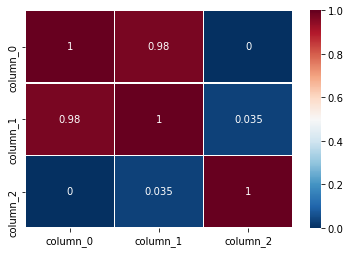

   column_0  column_2
0         1         1
1         2         0
2         3         1
3         4         0
4         5         1
5         6         0
6         7         1
7         8         0
8         9         1


In [13]:
# dataframe after drop columns having Pearson correlation more than 0.85
df1 = drop_column_greater_than_pearson_correlation_data_process(df)

print(df1)

# -------------------------------------------------------------------------------------------------
#                                        solution 2  
# -------------------------------------------------------------------------------------------------

# python function which take a dataframe as input and deals with the issue of outliers in all the continuous variables.

# UNIVARIATE oulier removal

# load boston dataset from sklearn by - 
# from sklearn.datasets import load_boston  

In [14]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Description of dataset

In [15]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# function to drop categorical, object and datetime64 type column from dataframe . 

In [16]:
def drop_categorical_and_object_and_datetime64_column_dataframe(boston_df):
    for col_data in boston_df.columns.to_list():
         categorical_1_dtype = is_categorical_dtype(boston_df[col_data])
         string_1_dtype = is_string_dtype(boston_df[col_data])
         numeric_1_dtype = is_numeric_dtype(boston_df[col_data])
         datetime64_1_dtype = is_datetime64_dtype(boston_df[col_data])
         object_1_dtype = is_object_dtype(boston_df[col_data])
                                                
         if(((categorical_1_dtype == False) and (string_1_dtype == False) and (object_1_dtype == False) and (numeric_1_dtype == True)) or ((categorical_1_dtype == False) and (string_1_dtype == False) and (object_1_dtype == False) and (datetime64_1_dtype == True))):
               print(col_data, "data type check of boston dataframe . ")
               print(boston_df[col_data])
               print("is_categorical_dtype(boston_df[col_data])")
               print(categorical_1_dtype)
               print("is_string_dtype(boston_df[col_data])")
               print(string_1_dtype)
               print("is_numeric_dtype(boston_df[col_data])")
               print(numeric_1_dtype)
               print("is_datetime64_dtype(boston_df[col_data])")
               print(datetime64_1_dtype)
               print("is_object_dtype(boston_df[col_data])")
               print(object_1_dtype)
               print(90 * "-", "\n\n")
         else:
               print(col_data, "data type check of boston dataframe . ")
               print(boston_df[col_data])
               print("is_categorical_dtype(boston_df[col_data])")
               print(categorical_1_dtype)
               print("is_string_dtype(boston_df[col_data])")
               print(string_1_dtype)
               print("is_numeric_dtype(boston_df[col_data])")
               print(numeric_1_dtype)
               print("is_datetime64_dtype(boston_df[col_data])")
               print(datetime64_1_dtype)
               print("is_object_dtype(boston_df[col_data])")
               print(object_1_dtype)
               print(90 * "-", "\n\n")
               boston_df = boston_df.drop([col_data], axis=1)
    return boston_df
                                               


# check if column data10 in "date_file.csv" file will be removed in dataframe in process function to remove categorical, object and string type columns from dataframe .  

# And after processing data10 column is removed during processing . 

In [17]:
print("----------------------   boston_df   ---------------------------\n\n")                                               
date_processed_custom_dataframe = pd.read_csv("date_file.csv")
date_processed_custom_dataframe["data3"] = pd.to_datetime(date_processed_custom_dataframe["data3"])
date_processed_custom_dataframe["data6"] = pd.to_datetime(date_processed_custom_dataframe["data6"])
date_processed_custom_dataframe = drop_categorical_and_object_and_datetime64_column_dataframe(date_processed_custom_dataframe).copy()
print(date_processed_custom_dataframe)                                                                                              

----------------------   boston_df   ---------------------------


data1 data type check of boston dataframe . 
0      0.05
1      1.00
2    100.00
Name: data1, dtype: float64
is_categorical_dtype(boston_df[col_data])
False
is_string_dtype(boston_df[col_data])
False
is_numeric_dtype(boston_df[col_data])
True
is_datetime64_dtype(boston_df[col_data])
False
is_object_dtype(boston_df[col_data])
False
------------------------------------------------------------------------------------------ 


data2 data type check of boston dataframe . 
0    10
1    16
2    26
Name: data2, dtype: int64
is_categorical_dtype(boston_df[col_data])
False
is_string_dtype(boston_df[col_data])
False
is_numeric_dtype(boston_df[col_data])
True
is_datetime64_dtype(boston_df[col_data])
False
is_object_dtype(boston_df[col_data])
False
------------------------------------------------------------------------------------------ 


data3 data type check of boston dataframe . 
0   2020-07-31 00:00:00
1   2020-07-16 00:00:00


# as data10 is removed and check works correctly, boston_df is used for processing to remove categorical, object and string type columns from dataframe . 

In [18]:
print("----------------------   boston_df   ---------------------------\n\n")                                               
boston_df = drop_categorical_and_object_and_datetime64_column_dataframe(boston_df).copy()
print(boston_df)                                                                                              

----------------------   boston_df   ---------------------------


CRIM data type check of boston dataframe . 
0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64
is_categorical_dtype(boston_df[col_data])
False
is_string_dtype(boston_df[col_data])
False
is_numeric_dtype(boston_df[col_data])
True
is_datetime64_dtype(boston_df[col_data])
False
is_object_dtype(boston_df[col_data])
False
------------------------------------------------------------------------------------------ 


ZN data type check of boston dataframe . 
0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64
is_categorical_dtype(boston_df[col_data])
False
is_string_dtype(boston_df[col_data])
False
is_numeric_dtype(boston_df[col_data])
True
is_datetime64_dtype(

# function to build chart of each of two variate or 2 column data scatter plot as - 
# scatter plot of column i to column (i+1)  

# for i = 0 to more. And length of i is - total column in dataframe .  

In [19]:
def two_variate_data_scatter_plot(boston_df):
    column_collection = boston_df.columns.to_list()
    for col_data_count in range(len(column_collection)):
        if((col_data_count+1)== len(boston_df.columns.to_list())):
            break
        fig, ax = plt.subplots(figsize=(16,8))
        ax.scatter(boston_df[column_collection[col_data_count]], boston_df[column_collection[col_data_count+1]])
        ax.set_xlabel(column_collection[col_data_count])
        ax.set_ylabel(column_collection[col_data_count+1])
        plt.show()

# print two variate data scatter plot for each 2 columns in dataset . 

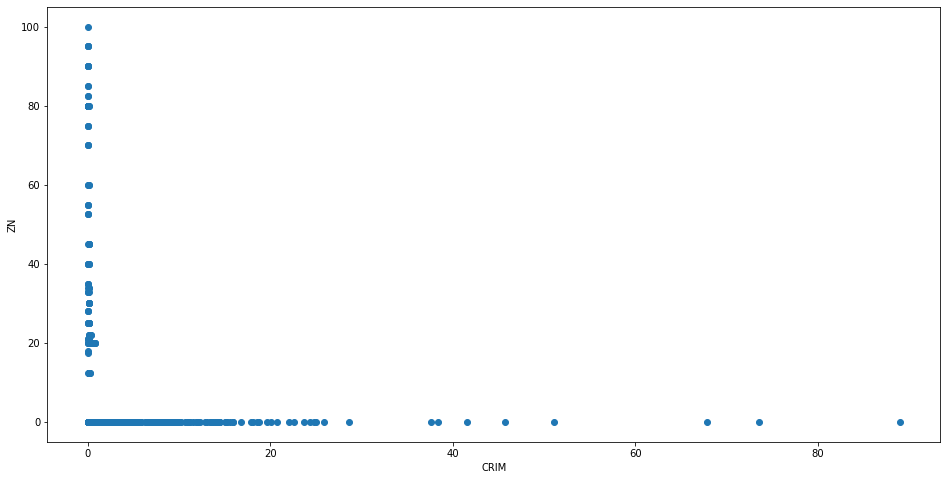

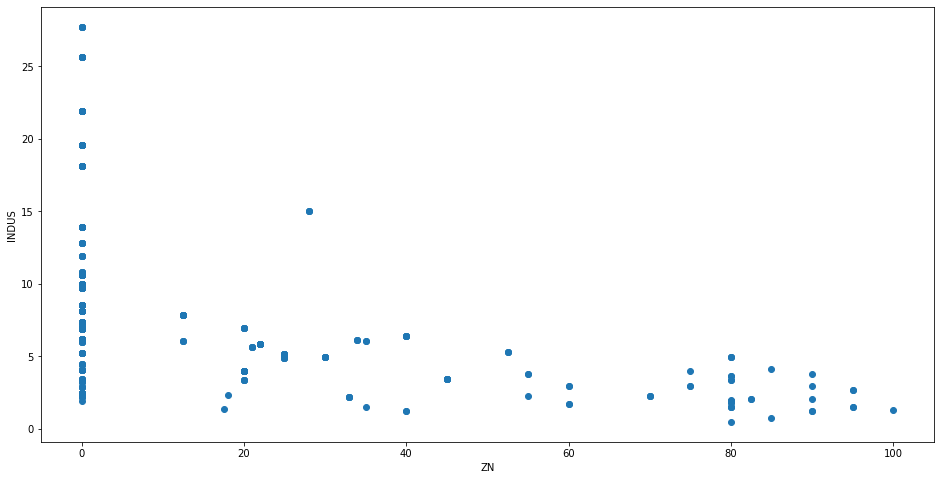

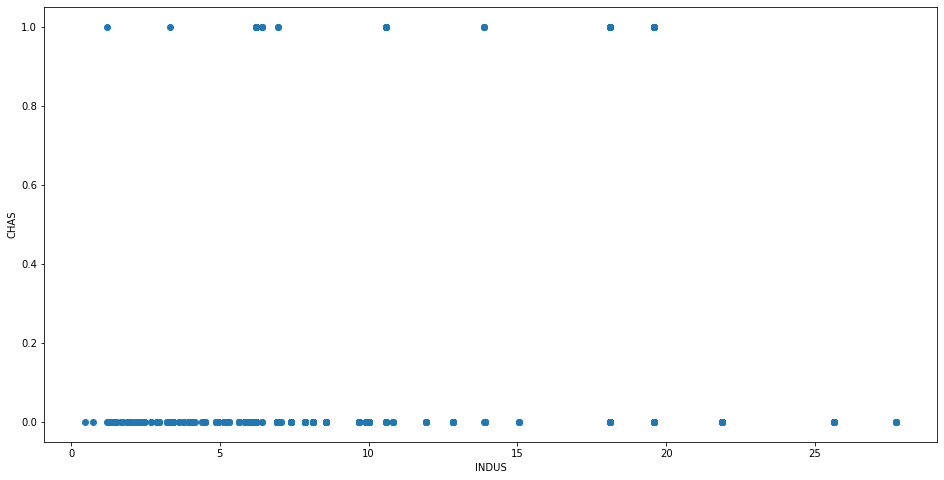

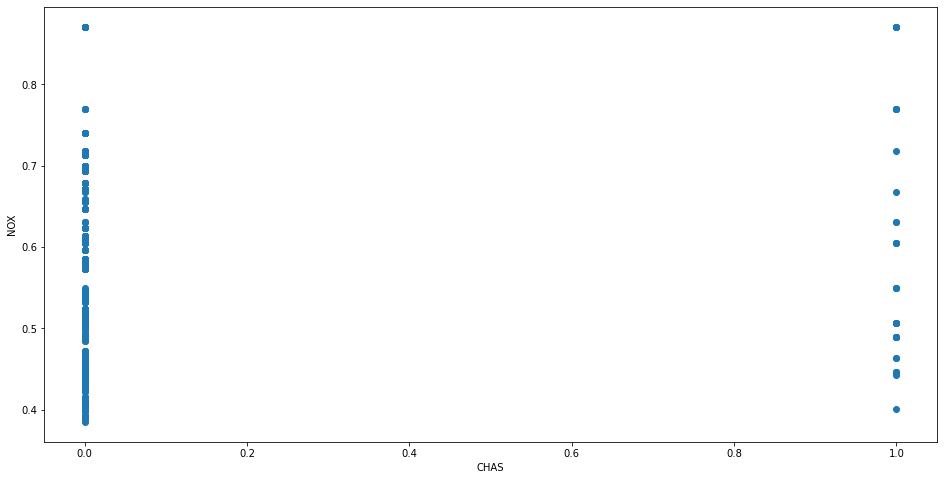

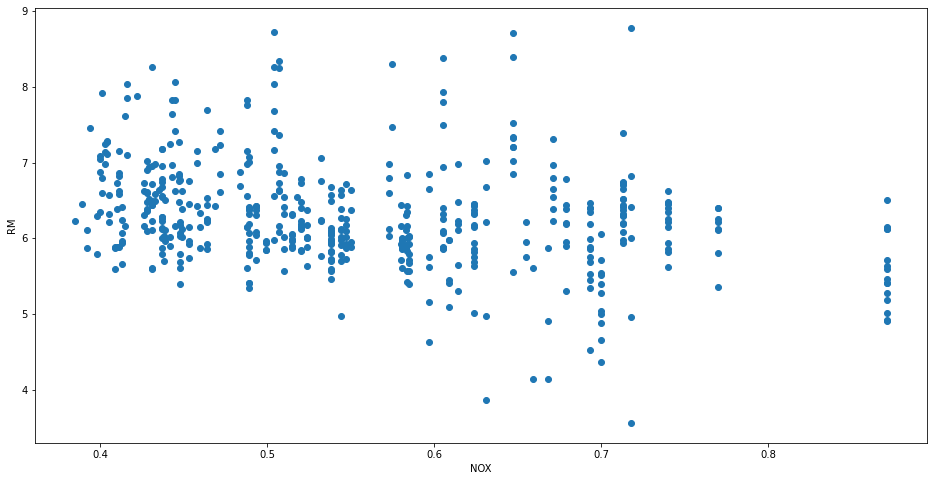

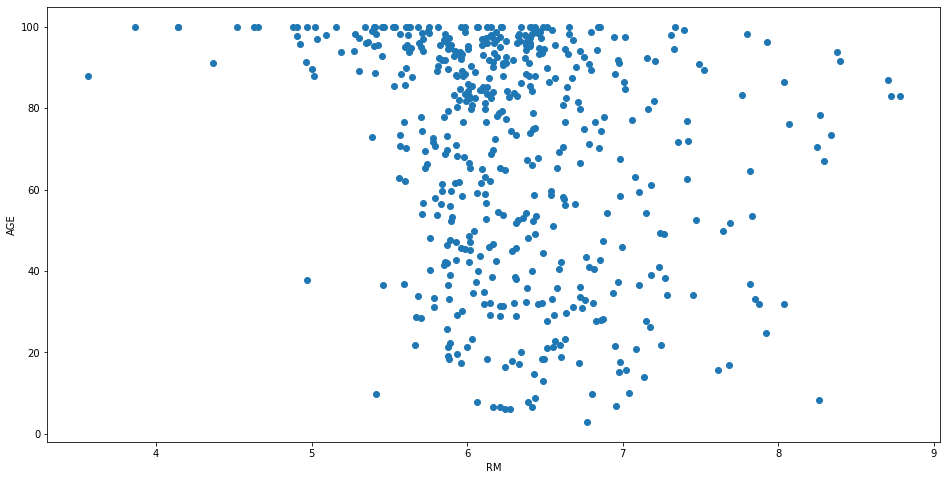

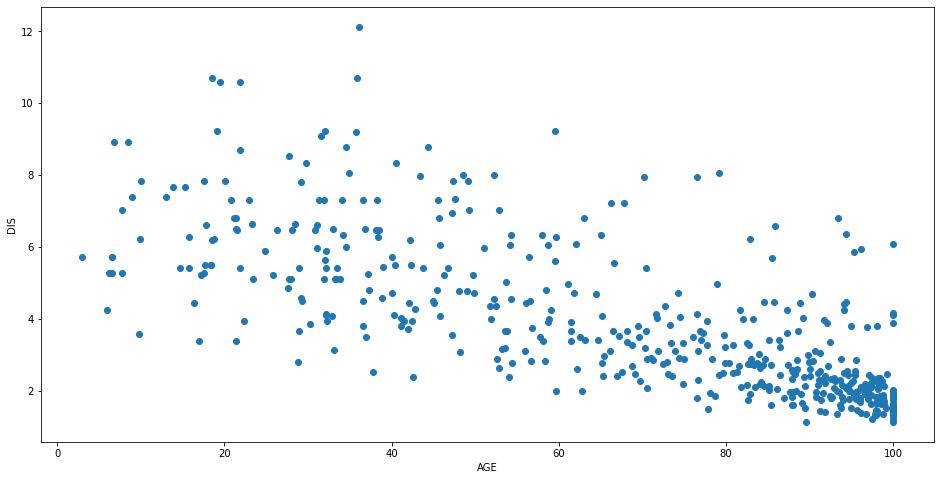

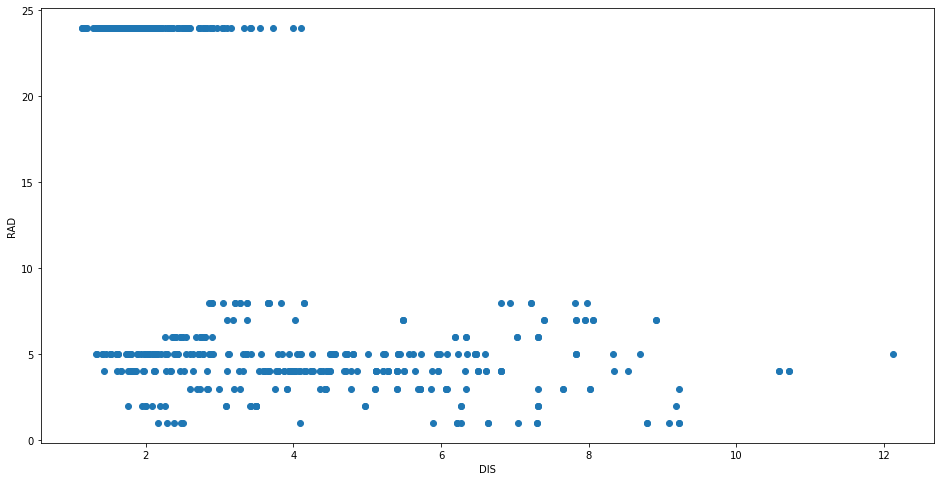

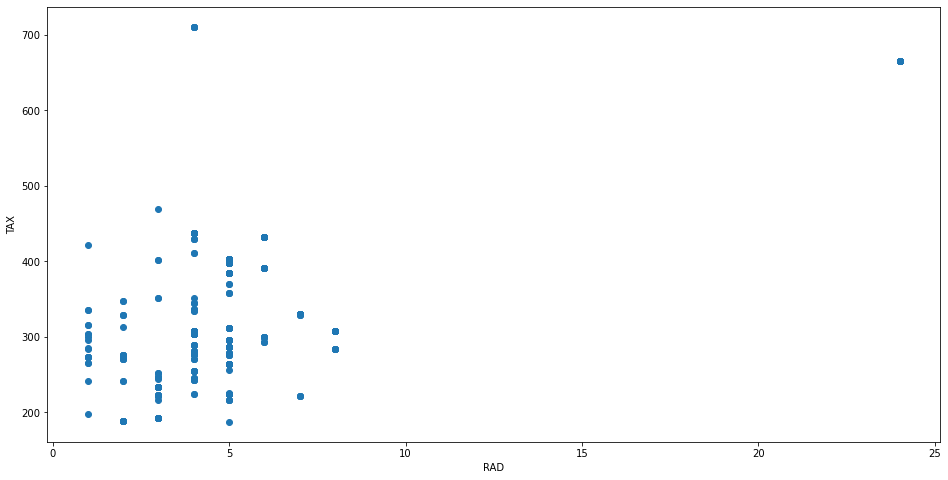

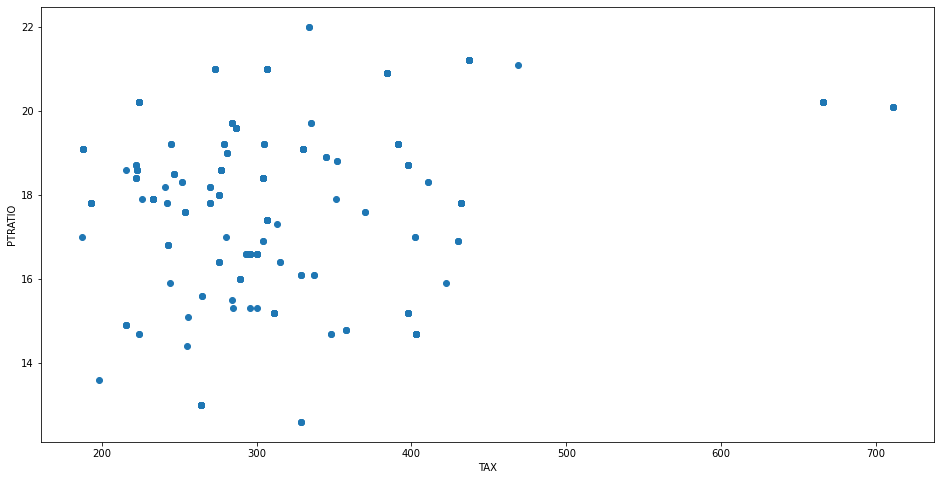

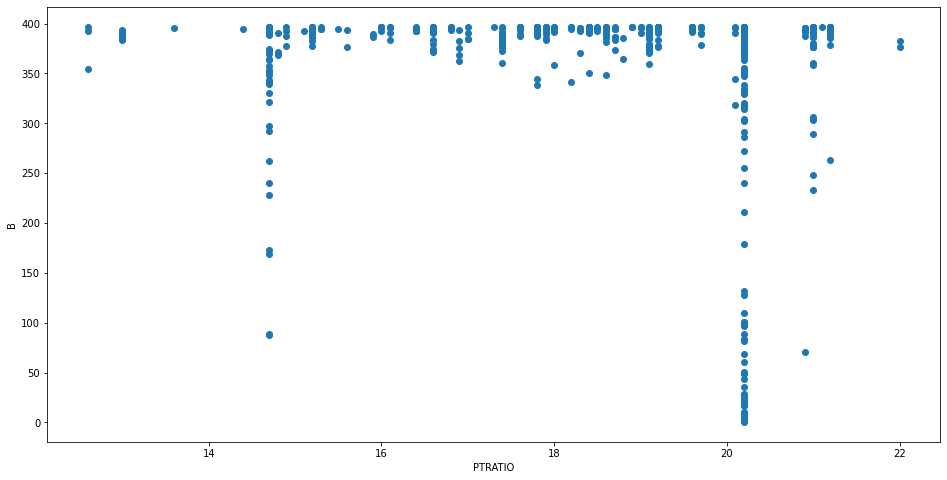

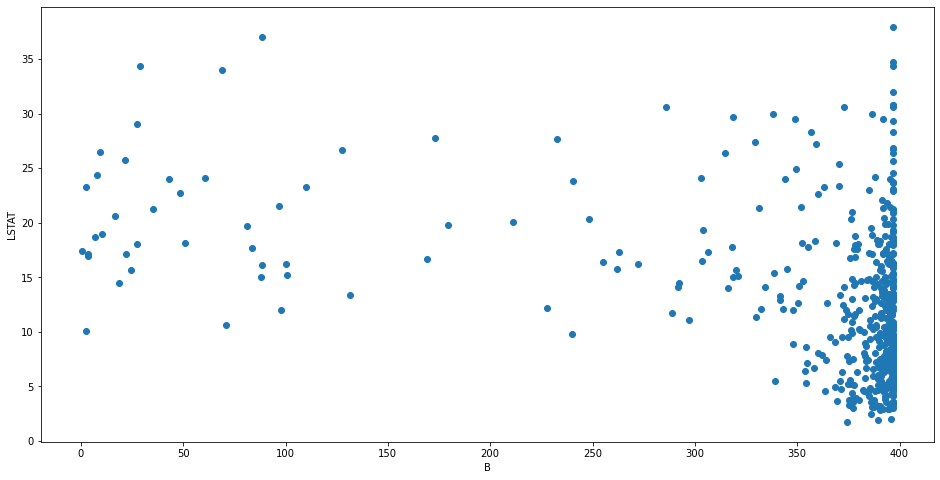

In [20]:
two_variate_data_scatter_plot(boston_df)

# Check the correlation between features before univariate outlier analysis . 

<AxesSubplot:>

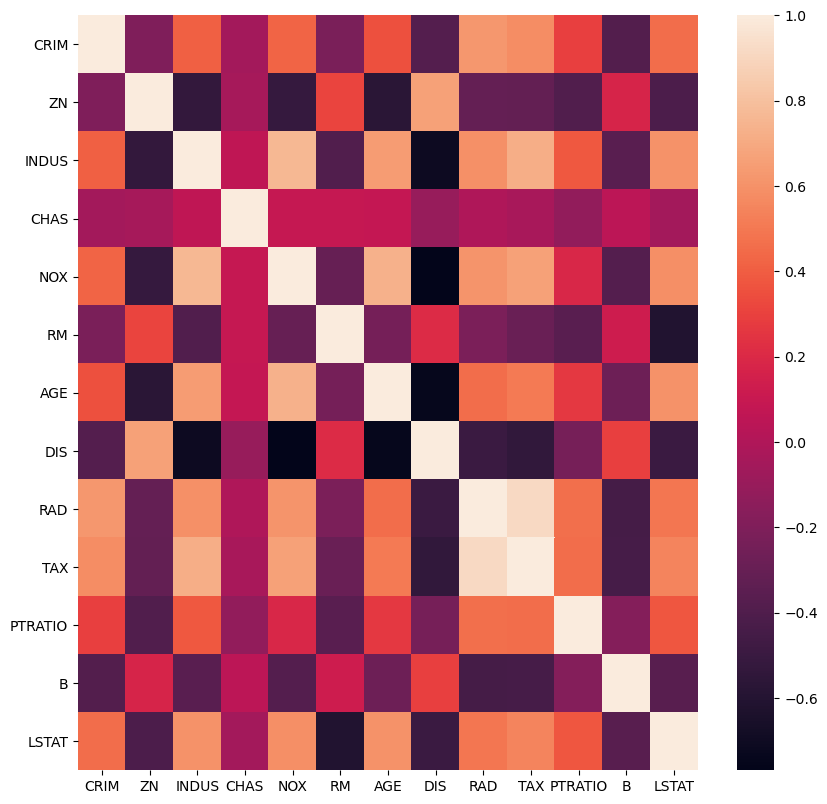

In [21]:
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(boston_df.corr())

# UNIVARIATE outlier removal by Z-Score 

In [22]:
def univariate_data_z_score_outlier_removal(boston_df):
    for col_data in boston_df.columns.to_list():
        print("univariate data z-score outlier removal of ", col_data)
        print(boston_df[col_data])
        #Oulier detection - Univarite - Boxplot
        sns.boxplot(x=boston_df[col_data])
        plt.show()
        z = np.abs(stats.zscore(boston_df[col_data]))
        print(z)
        print(z.shape)
        threshold = 3
        print(np.where(z > 3))
        # The first array contains the list of row numbers and 
        # second array respective column numbers . 
        
        # Removal of Outliers by z-score
        boston_df_Z_Score_outliers_removed  = boston_df[col_data][(z < 3)]
        
        # Z-Score score to filter out the outliers by keeping only valid values. 
        # code removed rows as outliers removal from the dataset by Z-Score calculation
        print("\n--------------------   z-score outlier removal   --------------------")
        print("\n", col_data, "column   ||| after |||   outlier row removal = ", boston_df_Z_Score_outliers_removed.shape, "\n", col_data, "column   ||| without|||   outlier row removal = ", boston_df[col_data].shape, "\n")
        

univariate data z-score outlier removal of  CRIM
0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64


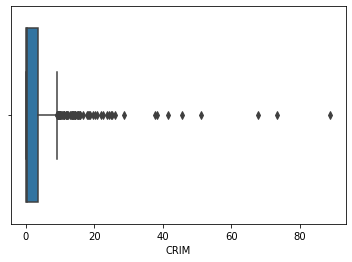

[4.19781939e-01 4.17339264e-01 4.17341592e-01 4.16750416e-01
 4.12481846e-01 4.17043676e-01 4.10242825e-01 4.03695667e-01
 3.95934736e-01 4.00729313e-01 3.94346241e-01 4.06847054e-01
 4.09603936e-01 3.47230211e-01 3.46275950e-01 3.47506015e-01
 2.97868176e-01 3.29257528e-01 3.27103460e-01 3.36053725e-01
 2.74842569e-01 3.21362768e-01 2.77090899e-01 3.05490623e-01
 3.33207236e-01 3.22701061e-01 3.42325079e-01 3.09291373e-01
 3.30562072e-01 3.03859070e-01 2.88921402e-01 2.62864272e-01
 2.58992534e-01 2.86488038e-01 2.32828340e-01 4.13049747e-01
 4.09178010e-01 4.11191267e-01 4.00146283e-01 4.17302025e-01
 4.16608441e-01 4.05686813e-01 4.04050605e-01 4.01972179e-01
 4.06239586e-01 4.00568718e-01 3.98597355e-01 3.93836526e-01
 3.90973745e-01 3.94942072e-01 4.10191621e-01 4.15470310e-01
 4.14279812e-01 4.14720867e-01 4.18934742e-01 4.18991764e-01
 4.18125948e-01 4.18850953e-01 4.02543572e-01 4.08498390e-01
 4.03140566e-01 4.00534970e-01 4.07684941e-01 4.05796204e-01
 4.18246976e-01 4.163466

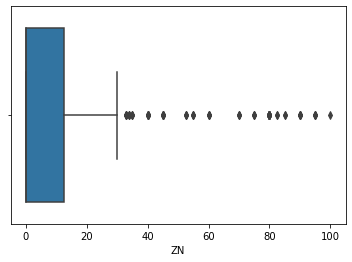

[0.28482986 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236
 0.04877224 0.04877224 0.04877224 0.04877224 0.04877224 0.04877224
 0.04877224 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236
 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236
 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236
 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236
 0.48772236 0.48772236 0.48772236 2.73124524 2.73124524 0.48772236
 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236
 0.48772236 0.48772236 0.41358857 0.41358857 0.41358857 0.41358857
 2.73124524 3.37503876 3.16044092 3.80423444 0.58526684 0.58526684
 0.58526684 0.58526684 0.58526684 0.58526684 0.26337008 2.94584308
 2.94584308 0.04877224 0.04877224 0.04877224 0.48772236 0.48772236
 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236
 0.48772236 0.48772236 0.58526684 0.58526684 0.58526684 0.58526684
 0.48772236 0.48772236 0.48772236 0.48772236 0.48772236 0.4877

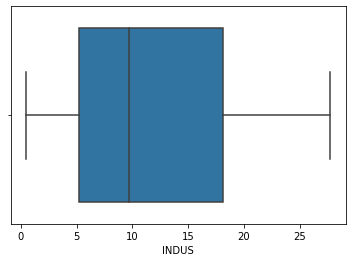

[1.2879095  0.59338101 0.59338101 1.30687771 1.30687771 1.30687771
 0.47665354 0.47665354 0.47665354 0.47665354 0.47665354 0.47665354
 0.47665354 0.43725801 0.43725801 0.43725801 0.43725801 0.43725801
 0.43725801 0.43725801 0.43725801 0.43725801 0.43725801 0.43725801
 0.43725801 0.43725801 0.43725801 0.43725801 0.43725801 0.43725801
 0.43725801 0.43725801 0.43725801 0.43725801 0.43725801 0.75534039
 0.75534039 0.75534039 0.75534039 1.19452752 1.19452752 0.61672651
 0.61672651 0.61672651 0.61672651 0.61672651 0.61672651 0.61672651
 0.61672651 0.61672651 0.80203138 0.80203138 0.80203138 0.80203138
 1.0413227  1.44695069 1.51698717 1.43235975 0.87644514 0.87644514
 0.87644514 0.87644514 0.87644514 0.87644514 1.42360519 1.13324559
 1.13324559 0.73929036 0.73929036 0.73929036 0.04768006 0.04768006
 0.04768006 0.04768006 0.24705682 0.24705682 0.24705682 0.24705682
 0.24705682 0.24705682 0.91584067 0.91584067 0.91584067 0.91584067
 0.96982713 0.96982713 0.96982713 0.96982713 1.12740922 1.1274

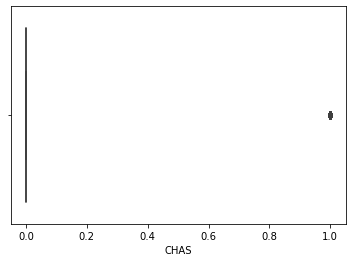

[0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857
 0.27259857 0.27259857 0.27259857 0.27259857 0.27259857 0.2725

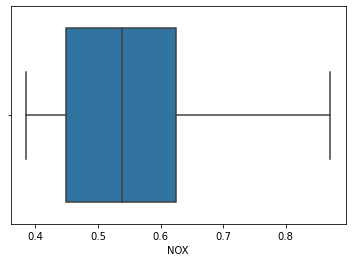

[0.14421743 0.74026221 0.74026221 0.83528384 0.83528384 0.83528384
 0.26515405 0.26515405 0.26515405 0.26515405 0.26515405 0.26515405
 0.26515405 0.14421743 0.14421743 0.14421743 0.14421743 0.14421743
 0.14421743 0.14421743 0.14421743 0.14421743 0.14421743 0.14421743
 0.14421743 0.14421743 0.14421743 0.14421743 0.14421743 0.14421743
 0.14421743 0.14421743 0.14421743 0.14421743 0.14421743 0.48111231
 0.48111231 0.48111231 0.48111231 1.09443374 1.09443374 0.92166714
 0.92166714 0.92166714 0.92166714 0.92166714 0.92166714 0.92166714
 0.92166714 0.92166714 0.99941211 0.99941211 0.99941211 0.99941211
 1.24992368 1.31039199 1.24992368 1.24128535 0.87847549 0.87847549
 0.87847549 0.87847549 0.87847549 0.87847549 1.19722987 1.35358364
 1.35358364 1.25856201 1.25856201 1.25856201 1.22400869 1.22400869
 1.22400869 1.22400869 1.01668877 1.01668877 1.01668877 1.01668877
 1.01668877 1.01668877 1.1117104  1.1117104  1.1117104  1.1117104
 0.91302881 0.91302881 0.91302881 0.91302881 0.56749561 0.56749

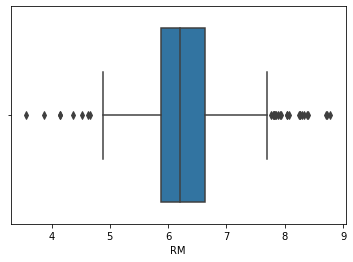

[4.13671889e-01 1.94274453e-01 1.28271368e+00 1.01630251e+00
 1.22857665e+00 2.07096381e-01 3.88410945e-01 1.60465557e-01
 9.31205901e-01 3.99808215e-01 1.31589471e-01 3.92684921e-01
 5.63643963e-01 4.78164442e-01 2.68739617e-01 6.42000190e-01
 4.98109663e-01 4.19753436e-01 1.18052117e+00 7.94438668e-01
 1.01811008e+00 4.55369903e-01 2.03205317e-01 6.71918022e-01
 5.13780909e-01 9.76794979e-01 6.71918022e-01 3.38547892e-01
 2.99699195e-01 5.54713098e-01 8.14383890e-01 3.02931425e-01
 4.76739783e-01 8.31479794e-01 2.68739617e-01 5.00958981e-01
 6.32027579e-01 6.19205651e-01 4.53945244e-01 4.42165063e-01
 1.05334363e+00 6.91480331e-01 1.64739533e-01 1.04903869e-01
 3.07205401e-01 8.58548308e-01 7.10383806e-01 3.62767089e-01
 1.26172671e+00 9.72521003e-01 4.58219220e-01 2.41671102e-01
 3.22493734e-01 4.08356167e-01 5.65068621e-01 1.37389184e+00
 1.40137423e-01 7.57014630e-01 1.98931341e-01 5.09506933e-01
 7.74493447e-01 4.53945244e-01 2.44137507e-01 6.80083062e-01
 1.16731633e+00 7.644166

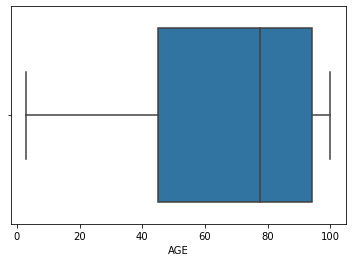

[0.12001342 0.36716642 0.26581176 0.80988851 0.51117971 0.35115713
 0.07022862 0.97880825 1.11749449 0.61609042 0.91479923 0.50940871
 1.0517004  0.24091936 0.56630562 0.42939039 1.39663795 0.46673602
 1.13704577 0.03289704 1.0499294  0.73344031 0.82234174 1.11749449
 0.90768711 0.60897831 0.77255694 0.71921608 0.91835528 0.66587522
 0.90768711 1.11749449 0.47740419 0.93969163 1.00725671 0.0133317
 0.25514359 0.96279897 1.36463343 1.66334224 1.87670567 2.33543704
 2.20386293 2.20741899 1.01613983 1.23661537 1.25439566 0.60186619
 0.9503598  0.23380725 0.81344457 0.19824667 1.68823464 1.67756646
 0.74587948 1.65978618 1.16905029 0.99835954 1.400194   0.76010371
 0.08445284 0.88279471 0.02755593 0.89523388 0.32270868 1.80558452
 1.33262892 1.67756646 1.12993366 1.26506383 2.20386293 1.81625269
 2.16119024 2.21808716 2.22519927 0.83833697 0.2106999  0.80988851
 0.52895999 1.13704577 1.24728354 0.06490156 1.29351229 0.777884
 0.73165525 0.44361462 0.83478091 0.41872222 0.63031465 0.1946906

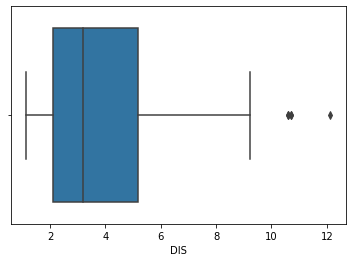

[1.40213603e-01 5.57159875e-01 5.57159875e-01 1.07773662e+00
 1.07773662e+00 1.07773662e+00 8.39243922e-01 1.02463789e+00
 1.08719646e+00 1.32963473e+00 1.21297914e+00 1.15593484e+00
 7.87143464e-01 4.33754047e-01 3.17003386e-01 3.34449434e-01
 3.34449434e-01 2.20028082e-01 6.92761271e-04 6.92761271e-04
 1.35827806e-03 1.03277421e-01 8.64493539e-02 1.42685523e-01
 2.87387889e-01 3.13533191e-01 4.21632134e-01 3.12962749e-01
 3.13580728e-01 2.11043605e-01 2.08191390e-01 1.80619980e-01
 9.26766896e-02 3.72817172e-03 1.67532861e-02 2.06663257e-01
 1.98296760e-01 6.61510917e-02 2.48415135e-02 7.63470081e-01
 7.63470081e-01 9.15493132e-01 9.15493132e-01 9.15493132e-01
 9.15493132e-01 6.20526581e-01 6.20526581e-01 9.00519004e-01
 9.86370670e-01 1.08985853e+00 1.43545190e+00 1.43545190e+00
 1.43545190e+00 1.43545190e+00 1.67551331e+00 2.33004908e+00
 2.56345533e+00 2.15330683e+00 1.91086857e+00 1.49121270e+00
 1.63068600e+00 1.43725830e+00 1.63073354e+00 1.98982739e+00
 2.58023586e+00 1.338856

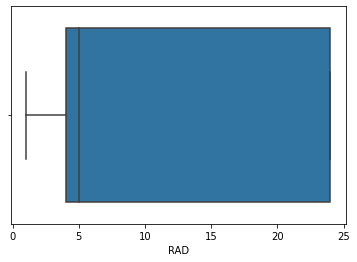

[0.98284286 0.8678825  0.8678825  0.75292215 0.75292215 0.75292215
 0.52300145 0.52300145 0.52300145 0.52300145 0.52300145 0.52300145
 0.52300145 0.6379618  0.6379618  0.6379618  0.6379618  0.6379618
 0.6379618  0.6379618  0.6379618  0.6379618  0.6379618  0.6379618
 0.6379618  0.6379618  0.6379618  0.6379618  0.6379618  0.6379618
 0.6379618  0.6379618  0.6379618  0.6379618  0.6379618  0.52300145
 0.52300145 0.52300145 0.52300145 0.75292215 0.75292215 0.75292215
 0.75292215 0.75292215 0.75292215 0.75292215 0.75292215 0.75292215
 0.75292215 0.75292215 0.6379618  0.6379618  0.6379618  0.6379618
 0.75292215 0.52300145 0.8678825  0.52300145 0.17812039 0.17812039
 0.17812039 0.17812039 0.17812039 0.17812039 0.75292215 0.6379618
 0.6379618  0.6379618  0.6379618  0.6379618  0.6379618  0.6379618
 0.6379618  0.6379618  0.52300145 0.52300145 0.52300145 0.52300145
 0.52300145 0.52300145 0.6379618  0.6379618  0.6379618  0.6379618
 0.75292215 0.75292215 0.75292215 0.75292215 0.8678825  0.8678825
 0.

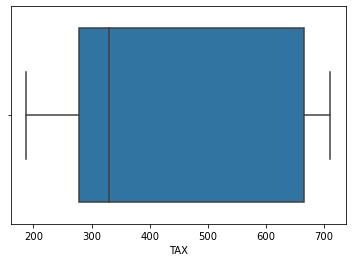

[0.66660821 0.98732948 0.98732948 1.10611514 1.10611514 1.10611514
 0.57751897 0.57751897 0.57751897 0.57751897 0.57751897 0.57751897
 0.57751897 0.6012761  0.6012761  0.6012761  0.6012761  0.6012761
 0.6012761  0.6012761  0.6012761  0.6012761  0.6012761  0.6012761
 0.6012761  0.6012761  0.6012761  0.6012761  0.6012761  0.6012761
 0.6012761  0.6012761  0.6012761  0.6012761  0.6012761  0.76757602
 0.76757602 0.76757602 0.76757602 0.92793666 0.92793666 1.04078303
 1.04078303 1.04078303 1.04078303 1.04078303 1.04078303 1.04078303
 1.04078303 1.04078303 0.9813902  0.9813902  0.9813902  0.9813902
 0.36088773 1.08235801 0.5656404  0.90417952 0.7378796  0.7378796
 0.7378796  0.7378796  0.7378796  0.7378796  1.14175084 0.42309761
 0.42309761 0.37558335 0.37558335 0.37558335 0.61315466 0.61315466
 0.61315466 0.61315466 0.06080135 0.06080135 0.06080135 0.06080135
 0.06080135 0.06080135 0.75569745 0.75569745 0.75569745 0.75569745
 0.95763307 0.95763307 0.95763307 0.95763307 0.82102956 0.82102956


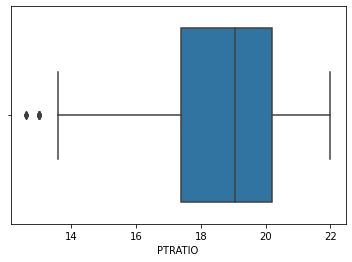

[1.45900038 0.30309415 0.30309415 0.1130321  0.1130321  0.1130321
 1.50523663 1.50523663 1.50523663 1.50523663 1.50523663 1.50523663
 1.50523663 1.17646583 1.17646583 1.17646583 1.17646583 1.17646583
 1.17646583 1.17646583 1.17646583 1.17646583 1.17646583 1.17646583
 1.17646583 1.17646583 1.17646583 1.17646583 1.17646583 1.17646583
 1.17646583 1.17646583 1.17646583 1.17646583 1.17646583 0.34421334
 0.34421334 0.34421334 0.34421334 0.0719129  0.0719129  0.2568579
 0.2568579  0.2568579  0.2568579  0.2568579  0.2568579  0.2568579
 0.2568579  0.2568579  0.76545664 0.76545664 0.76545664 0.76545664
 1.22270208 0.2568579  0.53427539 1.55147288 0.57539459 0.57539459
 0.57539459 0.57539459 0.57539459 0.57539459 0.06679585 1.08911039
 1.08911039 0.20550459 0.20550459 0.20550459 0.34421334 0.34421334
 0.34421334 0.34421334 0.1130321  0.1130321  0.1130321  0.1130321
 0.1130321  0.1130321  0.25174084 0.25174084 0.25174084 0.25174084
 0.0205596  0.0205596  0.0205596  0.0205596  0.30309415 0.30309415

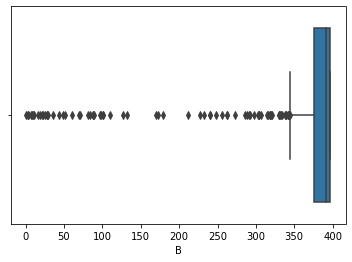

[4.41051933e-01 4.41051933e-01 3.96426994e-01 4.16162839e-01
 4.41051933e-01 4.10571016e-01 4.26798267e-01 4.41051933e-01
 3.28447972e-01 3.29325121e-01 3.93028043e-01 4.41051933e-01
 3.70880039e-01 4.41051933e-01 2.55973564e-01 4.27017554e-01
 3.30860131e-01 3.29763695e-01 7.42111978e-01 3.75814000e-01
 2.18146527e-01 3.93137687e-01 4.41051933e-01 4.15176047e-01
 4.12873532e-01 5.83896287e-01 2.21545478e-01 5.51441786e-01
 3.42811282e-01 2.58276079e-01 3.83310501e-02 2.19900825e-01
 1.36039215e+00 2.29809484e-02 1.18814208e+00 4.41051933e-01
 2.29001242e-01 4.41051933e-01 4.03005609e-01 4.27127197e-01
 4.27017554e-01 3.15071455e-01 2.92704164e-01 4.14298898e-01
 3.58709601e-01 4.41051933e-01 4.41051933e-01 3.95440202e-01
 4.41051933e-01 4.41051933e-01 4.26359692e-01 4.08926363e-01
 4.41051933e-01 4.41051933e-01 4.41051933e-01 4.30416505e-01
 4.41051933e-01 3.97194499e-01 3.72853624e-01 4.41051933e-01
 4.21425731e-01 2.34702708e-01 4.41051933e-01 4.26578980e-01
 4.00922381e-01 4.410519

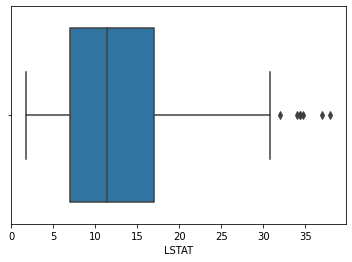

[1.07556230e+00 4.92439366e-01 1.20872740e+00 1.36151682e+00
 1.02650148e+00 1.04332233e+00 3.12676184e-02 9.10700206e-01
 2.42177359e+00 6.23343950e-01 1.09292612e+00 8.64783596e-02
 4.28502391e-01 6.15792295e-01 3.35444728e-01 5.86355801e-01
 8.51284251e-01 2.82721656e-01 1.34996218e-01 1.92467469e-01
 1.17282518e+00 1.64975678e-01 8.50425479e-01 1.01302707e+00
 5.11204923e-01 5.40641418e-01 3.02345986e-01 6.48575231e-01
 2.05966814e-02 9.43458210e-02 1.39429976e+00 5.42383894e-02
 2.11058779e+00 7.98561179e-01 1.07750701e+00 4.16745523e-01
 1.74244877e-01 5.44303666e-01 3.53667320e-01 1.16807700e+00
 1.49608365e+00 1.09518663e+00 9.59218064e-01 7.30734797e-01
 4.34968115e-01 3.42453418e-01 2.09831289e-01 8.61639382e-01
 2.54512652e+00 4.97187545e-01 1.11709641e-01 4.51788969e-01
 1.03351017e+00 5.91962752e-01 3.00944248e-01 1.09939185e+00
 9.64825016e-01 1.21994130e+00 8.12035592e-01 4.81225463e-01
 6.96575056e-02 2.50481686e-01 8.30258184e-01 4.41976804e-01
 6.45228790e-01 1.119016

In [23]:
univariate_data_z_score_outlier_removal(boston_df)

# UNIVARIATE outlier removal by IQR 

In [24]:
def univariate_data_by_IQR_outlier_removal(boston_df):
    for col_data in boston_df.columns.to_list():
        print("univariate data z-score outlier removal of ", col_data)
        print(boston_df[col_data])
        #Oulier detection - Univarite - Boxplot
        sns.boxplot(x=boston_df[col_data])
        plt.show()
        Q1 = boston_df[col_data].quantile(0.25)
        Q3 = boston_df[col_data].quantile(0.75)
        IQR = Q3 - Q1
        print(IQR)
        print((boston_df[col_data] < (Q1 - 1.5 * IQR)) |(boston_df[col_data] > (Q3 + 1.5 * IQR)))
        # removal of Outliers by IQR 
        boston_df_IQR_outliers_removed = boston_df[col_data][~((boston_df[col_data] < (Q1 - 1.5 * IQR)) |(boston_df[col_data] > (Q3 + 1.5 * IQR)))]
        # IQR score to filter out the outliers by keeping only valid values. 
        # code removed rows as outliers removal from the dataset by IQR calculation . 
        print("\n--------------------   IQR outlier removal   --------------------")
        print("\n", col_data, "column   ||| after |||   outlier row removal = ", boston_df_IQR_outliers_removed.shape, "\n", col_data, "column   ||| without |||   outlier row removal = ", boston_df[col_data].shape, "\n")
        

univariate data z-score outlier removal of  CRIM
0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64


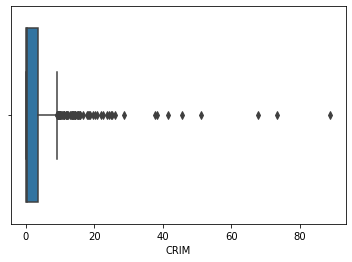

3.5950375
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: CRIM, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 CRIM column   ||| after |||   outlier row removal =  (440,) 
 CRIM column   ||| without |||   outlier row removal =  (506,) 

univariate data z-score outlier removal of  ZN
0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64


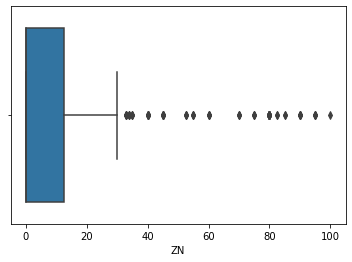

12.5
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: ZN, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 ZN column   ||| after |||   outlier row removal =  (438,) 
 ZN column   ||| without |||   outlier row removal =  (506,) 

univariate data z-score outlier removal of  INDUS
0       2.31
1       7.07
2       7.07
3       2.18
4       2.18
       ...  
501    11.93
502    11.93
503    11.93
504    11.93
505    11.93
Name: INDUS, Length: 506, dtype: float64


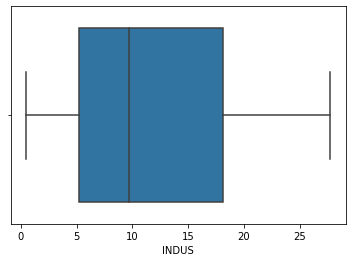

12.91
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: INDUS, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 INDUS column   ||| after |||   outlier row removal =  (506,) 
 INDUS column   ||| without |||   outlier row removal =  (506,) 

univariate data z-score outlier removal of  CHAS
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64


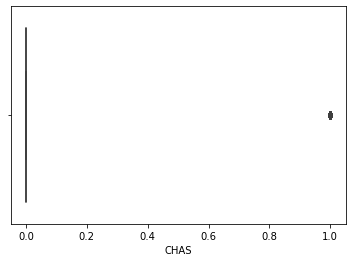

0.0
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: CHAS, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 CHAS column   ||| after |||   outlier row removal =  (471,) 
 CHAS column   ||| without |||   outlier row removal =  (506,) 

univariate data z-score outlier removal of  NOX
0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: NOX, Length: 506, dtype: float64


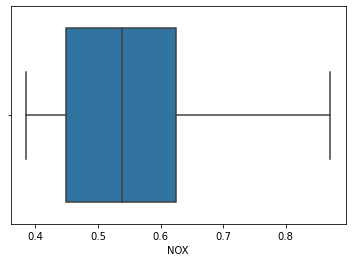

0.175
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: NOX, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 NOX column   ||| after |||   outlier row removal =  (506,) 
 NOX column   ||| without |||   outlier row removal =  (506,) 

univariate data z-score outlier removal of  RM
0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64


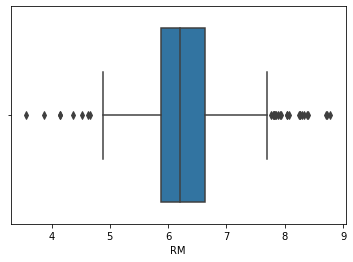

0.7379999999999995
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: RM, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 RM column   ||| after |||   outlier row removal =  (476,) 
 RM column   ||| without |||   outlier row removal =  (506,) 

univariate data z-score outlier removal of  AGE
0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64


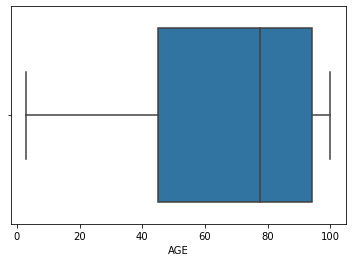

49.04999999999999
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: AGE, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 AGE column   ||| after |||   outlier row removal =  (506,) 
 AGE column   ||| without |||   outlier row removal =  (506,) 

univariate data z-score outlier removal of  DIS
0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: DIS, Length: 506, dtype: float64


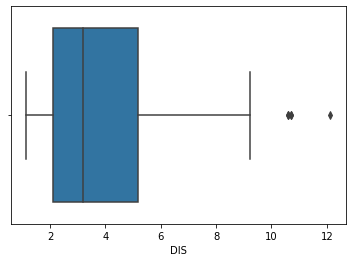

3.0882500000000004
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 DIS column   ||| after |||   outlier row removal =  (501,) 
 DIS column   ||| without |||   outlier row removal =  (506,) 

univariate data z-score outlier removal of  RAD
0      1.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
501    1.0
502    1.0
503    1.0
504    1.0
505    1.0
Name: RAD, Length: 506, dtype: float64


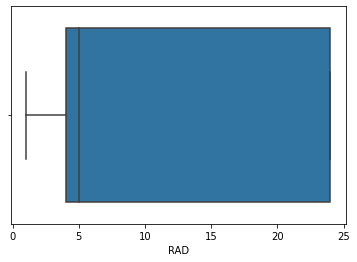

20.0
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: RAD, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 RAD column   ||| after |||   outlier row removal =  (506,) 
 RAD column   ||| without |||   outlier row removal =  (506,) 

univariate data z-score outlier removal of  TAX
0      296.0
1      242.0
2      242.0
3      222.0
4      222.0
       ...  
501    273.0
502    273.0
503    273.0
504    273.0
505    273.0
Name: TAX, Length: 506, dtype: float64


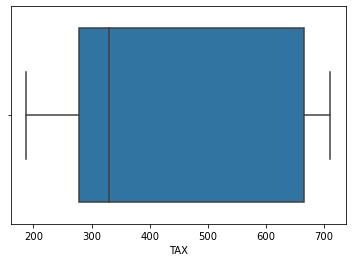

387.0
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: TAX, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 TAX column   ||| after |||   outlier row removal =  (506,) 
 TAX column   ||| without |||   outlier row removal =  (506,) 

univariate data z-score outlier removal of  PTRATIO
0      15.3
1      17.8
2      17.8
3      18.7
4      18.7
       ... 
501    21.0
502    21.0
503    21.0
504    21.0
505    21.0
Name: PTRATIO, Length: 506, dtype: float64


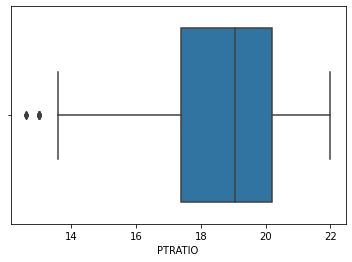

2.8000000000000007
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: PTRATIO, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 PTRATIO column   ||| after |||   outlier row removal =  (491,) 
 PTRATIO column   ||| without |||   outlier row removal =  (506,) 

univariate data z-score outlier removal of  B
0      396.90
1      396.90
2      392.83
3      394.63
4      396.90
        ...  
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: B, Length: 506, dtype: float64


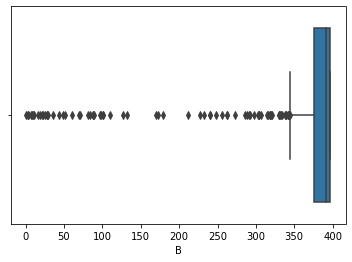

20.847500000000025
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: B, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 B column   ||| after |||   outlier row removal =  (429,) 
 B column   ||| without |||   outlier row removal =  (506,) 

univariate data z-score outlier removal of  LSTAT
0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64


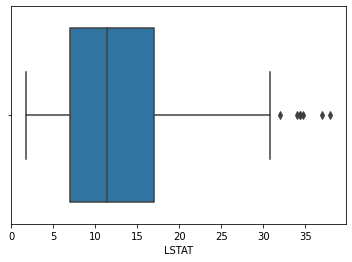

10.005000000000003
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: LSTAT, Length: 506, dtype: bool

--------------------   IQR outlier removal   --------------------

 LSTAT column   ||| after |||   outlier row removal =  (499,) 
 LSTAT column   ||| without |||   outlier row removal =  (506,) 



In [25]:
univariate_data_by_IQR_outlier_removal(boston_df)

# univariate data outlier removal 

# Parametric methods: Univariate outlier check and analysis with lot of  visualization . 
# dataframe where features have **normal distributions** .

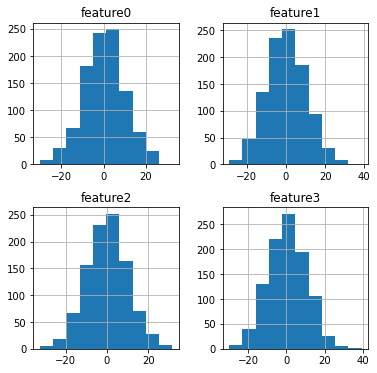

In [26]:
# seed for reproducibility
np.random.seed(42)
n_feats=4
dummydf = pd.DataFrame(np.random.normal(scale=10.0, size=(1000, n_feats)),
                           columns=['feature{}'.format(i) for i in range(n_feats)])
# total normally distributed
dummydf.hist(figsize=(6,6));

In [27]:
# variation between features to show outliers
dummydf.describe()

,feature0,feature1,feature2,feature3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.306239,0.248285,-0.082552,0.300861
std,9.639191,10.118843,10.060754,10.069640
min,-30.195122,-28.962554,-32.412673,-29.911360
25%,-6.129422,-6.770368,-6.752986,-6.708710
50%,0.561874,0.202097,-0.075088,0.211577
75%,6.648813,6.938808,6.422820,6.958780
max,32.430930,38.527315,31.520567,39.262377


# two functions that statistically identify outliers in a pandas `Series` using a standard deviation and interquartile range method.

In [28]:
def out_std(s, nstd=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s]

def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

# Both functions return a list of boolean values. This is a example of what the output of `out_std` looks like on randomly generated data from a normal distribution.

# Standard Deviation

In [29]:
# outlier_mask is a boolean list identifies the indices of the outliers
outlier_mask = out_std(dummydf['feature0'], nstd=3.0)
# first 10 elements
outlier_mask[:10]

[False, False, False, False, False, False, False, False, False, False]

# Identify the outliers, notice these values are on both **low** and **high**.

In [30]:
dummydf['feature0'][outlier_mask]

506   -30.195122
788   -29.069882
929    32.430930
Name: feature0, dtype: float64

# Visualize the outliers in the context of the feature's distribution.

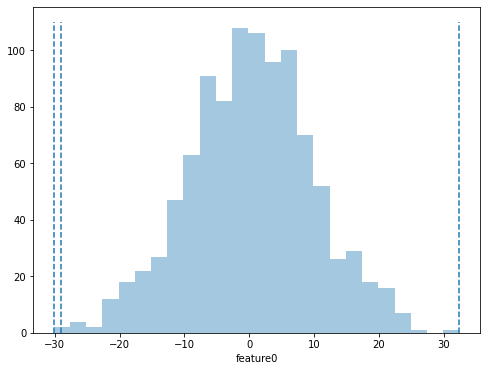

In [31]:
plt.figure(figsize=(8,6))
sns.distplot(dummydf['feature0'], kde=False);
plt.vlines(dummydf['feature0'][outlier_mask], ymin=0, ymax=110, linestyles='dashed');

# Compare Standard Deviation and IQR

In [32]:
# For comparison, make one array each using standard deviations of 2.0, 3.0 and 4.0.
std2 = dummydf.apply(out_std, nstd=2.0)
std3 = dummydf.apply(out_std, nstd=3.0)
std4 = dummydf.apply(out_std, nstd=4.0)

# For comparison, make one array each at varying values of k.
iqr1 = dummydf.apply(out_iqr, k=1.5)
iqr2 = dummydf.apply(out_iqr, k=2.0)
iqr3 = dummydf.apply(out_iqr, k=3.0)

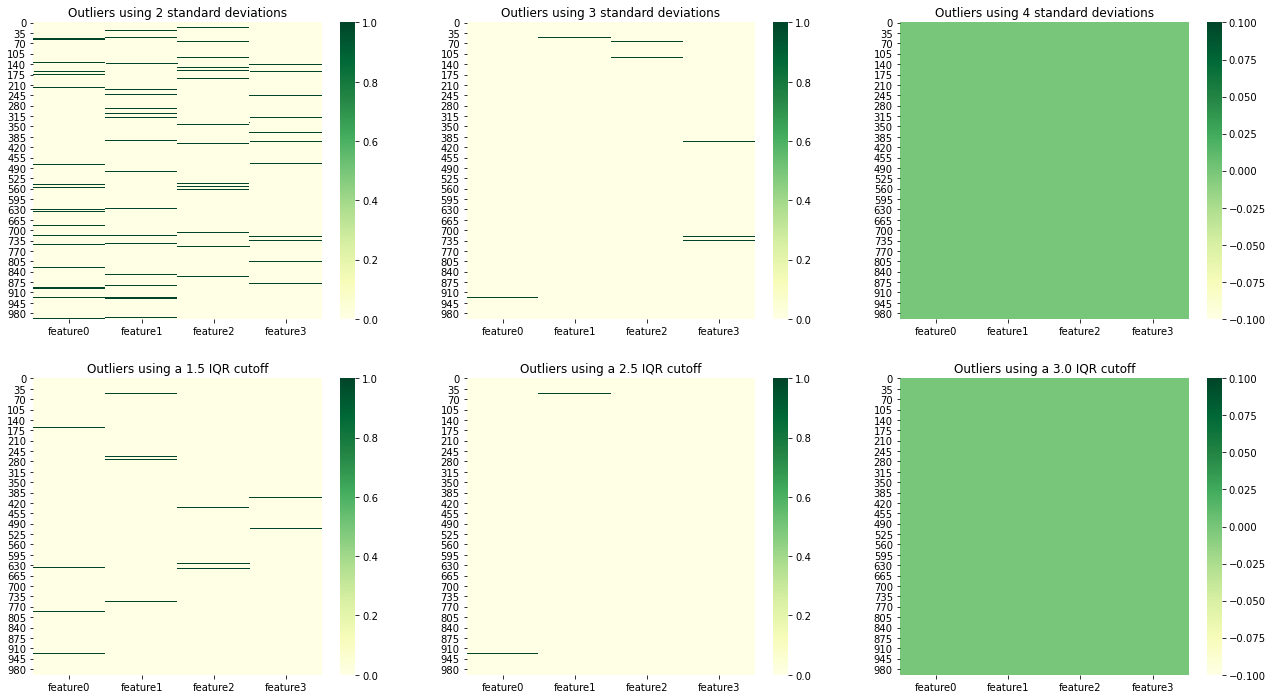

In [33]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(22, 12));
ax1.set_title('Outliers using 2 standard deviations');
ax2.set_title('Outliers using 3 standard deviations');
ax3.set_title('Outliers using 4 standard deviations');
ax4.set_title('Outliers using a 1.5 IQR cutoff');
ax5.set_title('Outliers using a 2.5 IQR cutoff');
ax6.set_title('Outliers using a 3.0 IQR cutoff');

sns.heatmap(std2, cmap='YlGn', ax=ax1);
sns.heatmap(std3, cmap='YlGn', ax=ax2);
sns.heatmap(std4, cmap='YlGn', ax=ax3);
sns.heatmap(iqr1, cmap='YlGn', ax=ax4);
sns.heatmap(iqr2, cmap='YlGn', ax=ax5);
sns.heatmap(iqr3, cmap='YlGn', ax=ax6);

plt.savefig('outliers.png') 
plt.show()

# A detailed visualization of the different standard deviation cutoffs for `feature0`, note `return_thresholds=True` in the outlier function:

In [34]:
def plot_cutoff(dataframe, col, nstd=2.0, color='red'):
    lower, upper = out_std(dataframe[col], nstd=nstd, return_thresholds=True)
    plt.axvspan(min(dataframe[col][dataframe[col] < lower], default=dataframe[col].min()), lower, alpha=0.2, color=color);
    plt.axvspan(upper, max(dataframe[col][dataframe[col] > upper], default=dataframe[col].max()), alpha=0.2, color=color);

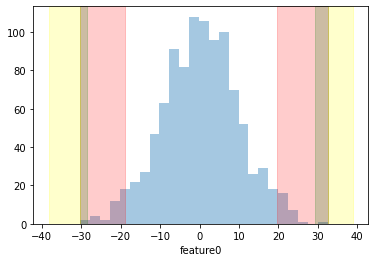

In [35]:
column = 'feature0'
sns.distplot(dummydf[column], kde=False)
plot_cutoff(dummydf, column, nstd=2.0, color='red');
plot_cutoff(dummydf, column, nstd=3.0, color='green');
plot_cutoff(dummydf, column, nstd=4.0, color='yellow');

# Nonparametric methods: Univariate outlier check and analysis with lot of  visualization . 

# The features in the Melbourne Housing dataset to verify nonparametric outlier detection method.

In [36]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

# fill missing values with the median value for a column to check filled values will be whole numbers.

In [37]:
df.fillna(df.median(), inplace=True)

# detection of outliers to a subset of the columns in dataset.

In [38]:
cols = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount']

# Visualize the distribution of the features.

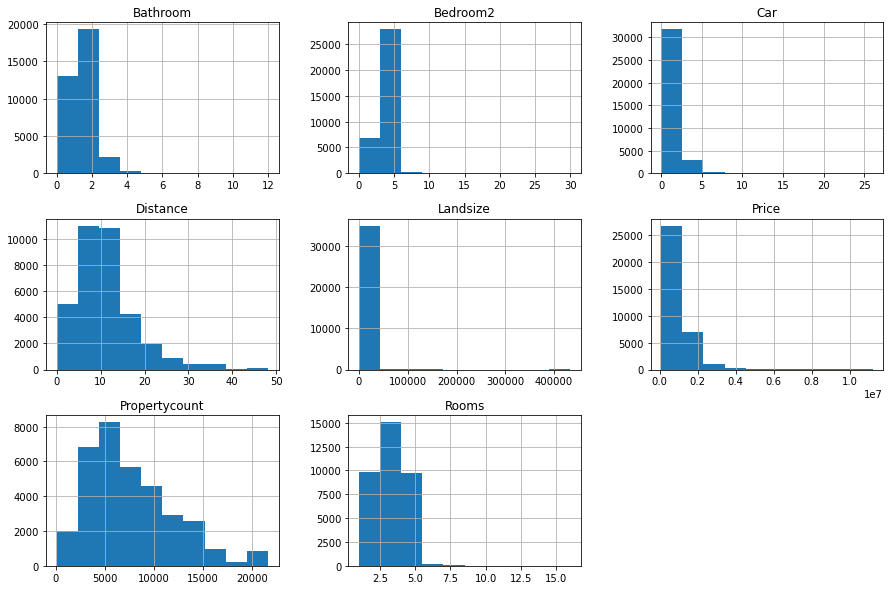

In [39]:
df[cols].hist(figsize=(15,10));


# Isolation Forest

# [IsolationForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest) is implemented in scikit-learn. It returns an `anomaly_score` for each data point.  

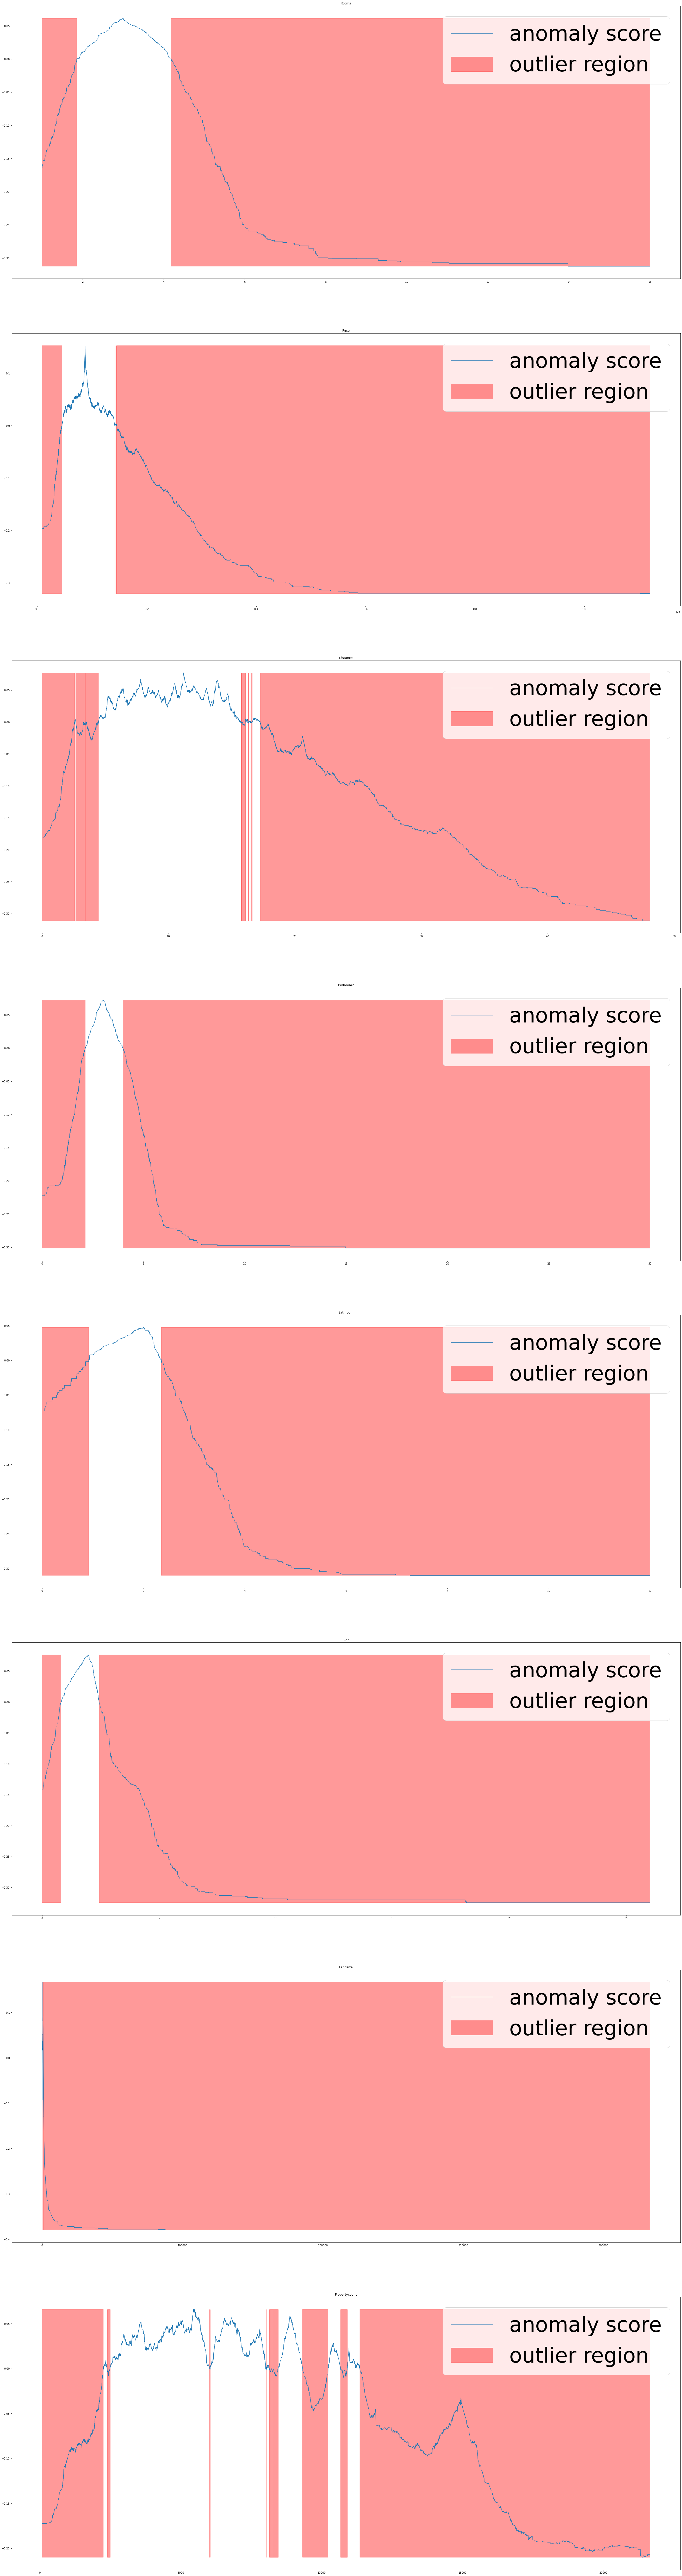

In [40]:
fig, axs = plt.subplots(8, 1, figsize=(46, 181), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df[column].values.reshape(-1,1))

    xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend(fontsize=80)
    axs[i].set_title(column)